In [5]:
import pickle
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import sys
sys.path.append("/Users/lesrene/Desktop/DS4300/practical-01-pavi_lesrene_zainab/indexer")

from indexer.abstract_index import AbstractIndex
from indexer.trees.avl_tree import AVLTreeIndex
from indexer.trees.bst_index import BinarySearchTreeIndex
from indexer.maps.hash_map import HashMapIndex
from indexer.arrays.array import SortedArrayIndex

In [2]:
with open("/Users/lesrene/BST.pkl", "rb") as f:  
    BST = pickle.load(f) 
    f.close()
    
with open("/Users/lesrene/AVL.pkl", "rb") as f:  
    AVL = pickle.load(f) 
    f.close()
    
with open("/Users/lesrene/Hash.pkl", "rb") as f:  
    HASH = pickle.load(f) 
    f.close()
    
with open("/Users/lesrene/Array.pkl", "rb") as f:  
    ARR = pickle.load(f) 
    f.close()

### Data Characteristics

In [35]:
keys_HASH = HASH.get_keys_in_order()

In [36]:
key_doc_lengths = [(key, len(HASH.search(key))) for key in keys_HASH]
top_keys = sorted(key_doc_lengths, key=lambda x: x[1], reverse=True)[:10]

top_words = [pair[0] for pair in top_keys]
top_lengths = [pair[1] for pair in top_keys]

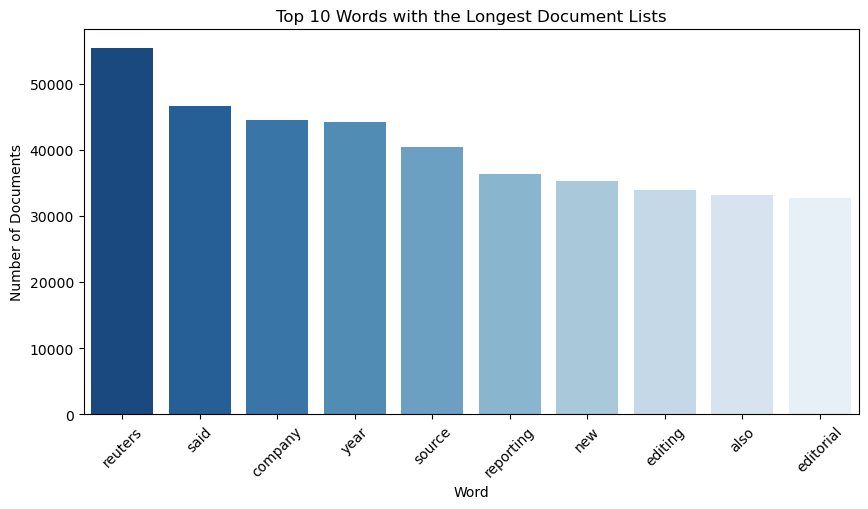

In [37]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_words, y=top_lengths, palette="Blues_r")
plt.xlabel("Word")
plt.ylabel("Number of Documents")
plt.title("Top 10 Words in the Most Documents")
plt.xticks(rotation=45)
plt.show()

In [38]:
avg_numdocs, valuels_lengths = HASH.get_avg_value_list_len()

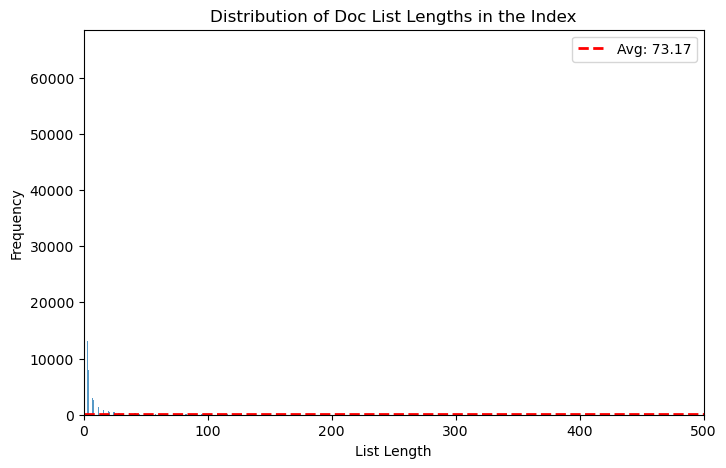

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(valuels_lengths, bins='auto')
plt.axhline(avg_numdocs, color='red', linestyle='dashed', linewidth=2, label=f'Avg: {avg_numdocs:.2f}')  # add line for avg
plt.xlabel("List Length")
plt.ylabel("Frequency")
plt.title("Distribution of Doc List Lengths in the Index")
plt.legend()  # shows a legend for the avg line
plt.show()

### Index Structures & Index Efficiency

Providing evidence that supports the assertion that each index is properly constructed.

In [12]:
depths_BST = BST.get_node_depths()
frequency_depths = list(Counter(depths_BST).values())

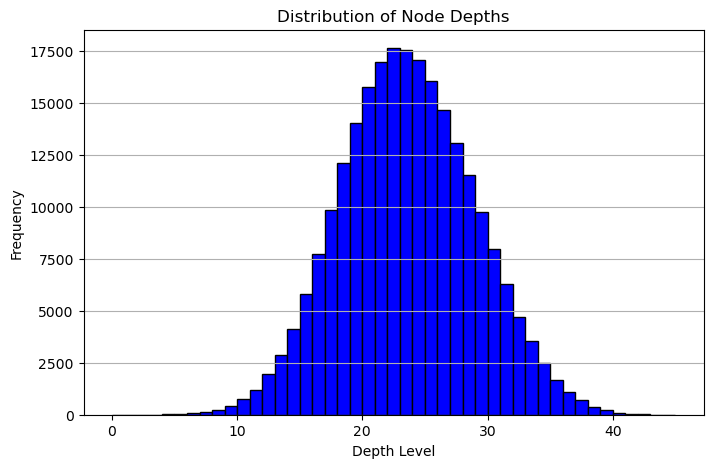

In [34]:
plt.figure(figsize=(8, 5))
plt.hist(depths_BST, bins=range(min(depths_BST), max(depths_BST) + 1), color='blue', edgecolor='black')
plt.xlabel("Depth Level")
plt.ylabel("Frequency")
plt.title("Distribution of Node Depths")
plt.grid(axis='y')
plt.show()

In [3]:
AVL_bfs = AVL.get_balance_factors(AVL.root)
AVL_keys = []
AVL_bfs_by_key = []
for element in AVL_bfs[:1000]:
    k,v = element
    AVL_keys.append(str(k))
    AVL_bfs_by_key.append(float(v))

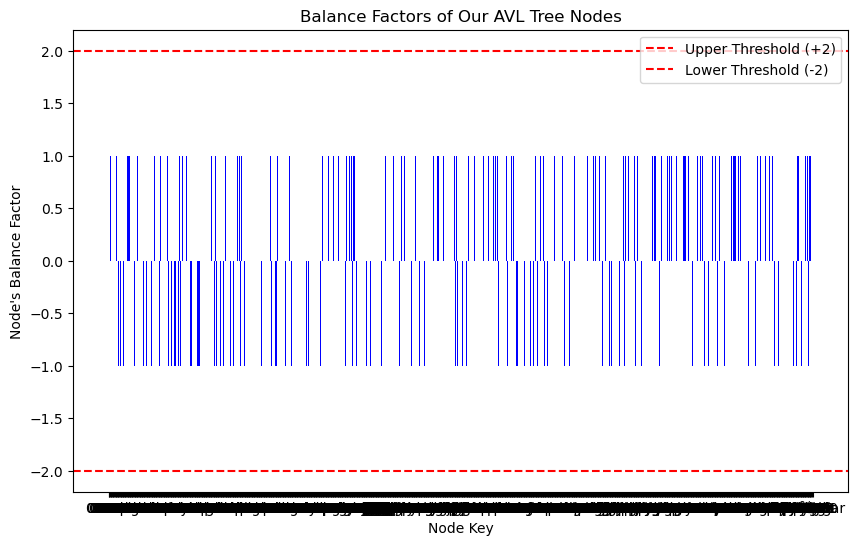

In [4]:
plt.figure(figsize=(10, 6))
plt.bar(AVL_keys, AVL_bfs_by_key, color='blue')
plt.axhline(y=2, color='r', linestyle='--', label='Upper Threshold (+2)')
plt.axhline(y=-2, color='r', linestyle='--', label='Lower Threshold (-2)')
plt.xlabel("Node Key")
plt.ylabel("Node's Balance Factor")
plt.title("Balance Factors of Our AVL Tree Nodes")
plt.legend()
plt.show()

### Search Performance Analysis

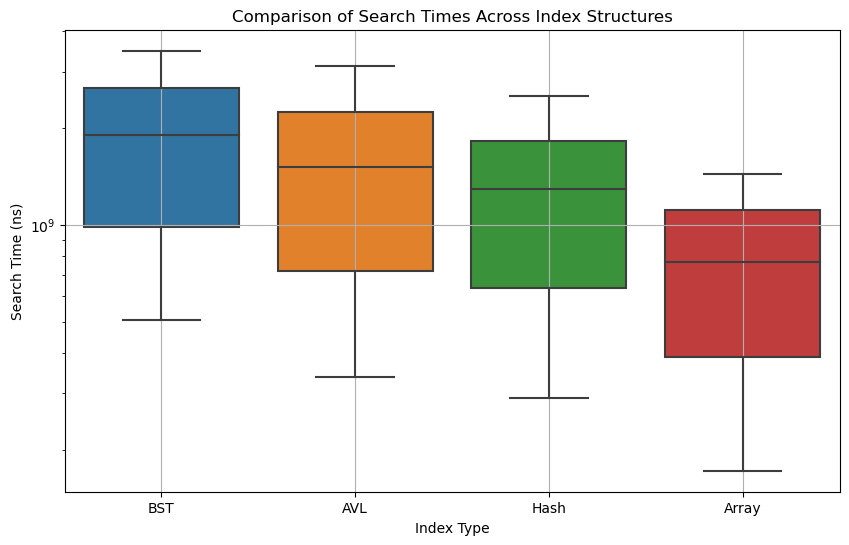

In [6]:
df = pd.read_csv("/Users/lesrene/Desktop/DS4300/practical-01-pavi_lesrene_zainab/timing_data/timing_data.csv")

plt.figure(figsize=(10, 6))
sns.boxplot(x=df["index_type"], y=df["search_time"])
plt.xlabel("Index Type")
plt.ylabel("Search Time (ns)")
plt.title("Comparison of Search Times Across Index Structures")
plt.yscale("log")  # Log scale if search times vary significantly
plt.grid()
plt.show()

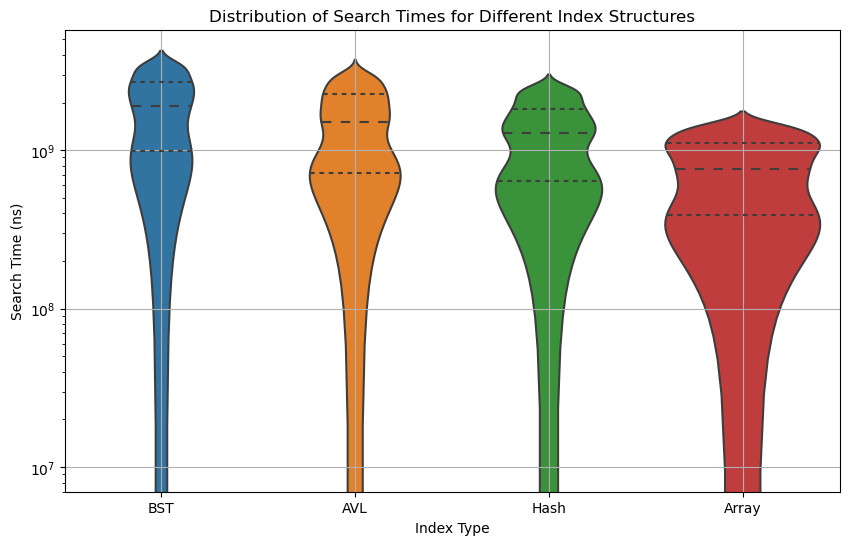

In [7]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df["index_type"], y=df["search_time"], inner="quartile")
plt.xlabel("Index Type")
plt.ylabel("Search Time (ns)")
plt.title("Distribution of Search Times for Different Index Structures")
plt.yscale("log")  # Log scale helps in case of large variations
plt.grid()
plt.show()

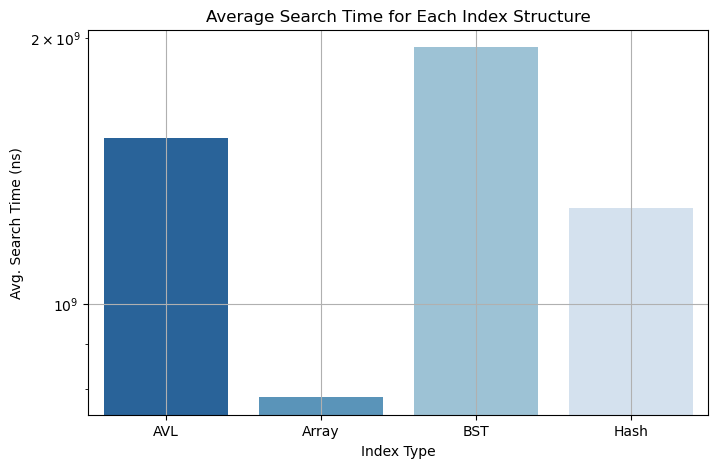

In [8]:
avg_search_times = df.groupby("index_type")["search_time"].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_search_times["index_type"], y=avg_search_times["search_time"], palette="Blues_r")
plt.xlabel("Index Type")
plt.ylabel("Avg. Search Time (ns)")
plt.title("Average Search Time for Each Index Structure")
plt.yscale("log")  # Log scale for better readability if needed
plt.grid()
plt.show()

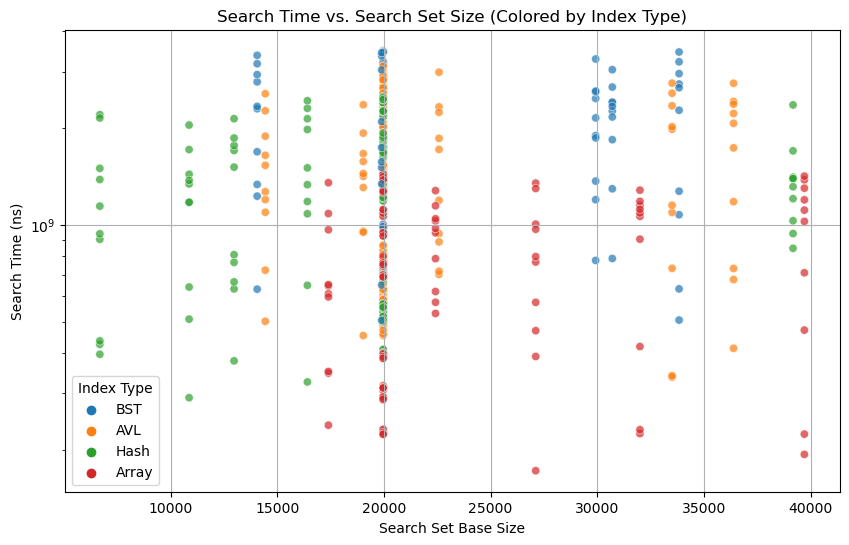

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["search_set_base_size"], y=df["search_time"], hue=df["index_type"], alpha=0.7)
plt.xlabel("Search Set Base Size")
plt.ylabel("Search Time (ns)")
plt.title("Search Time vs. Search Set Size (Colored by Index Type)")
plt.yscale("log")  # Log scale to handle large variations
plt.legend(title="Index Type")
plt.grid()
plt.show()